In [1]:
! pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 29.9 MB/s eta 0:00:00


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import logomaker as lm

In [3]:
df = pd.read_csv("data.tsv", sep="\t")
df.head()

,EntryID,OrganismName,Kingdom,SequenceLength,SPStart,SPEnd,Label,HelixDomain,Set,Sequence
0,Q16552,Homo sapiens,Metazoa,155,1.0,23.0,Positive,NaN,4,MTPGKTSLVSLLLLLSLEAIVKAGITIPRNPGCPNSEDKNFPRTVM...
1,Q9M373,Arabidopsis thaliana,Viridiplantae,74,1.0,26.0,Positive,NaN,1,MASRNSVAVIALFAFVFAVISPFAGAQSLAPAPSPTSDGTSIDQGI...
2,P62520,Chilobrachys guangxiensis,Metazoa,63,1.0,27.0,Positive,NaN,2,MKNTSILFILGLALLLVLAFEAQVGESDGECGGFWWKCGRGKPPCC...
3,Q8I7X1,Porcellio scaber,Metazoa,145,1.0,21.0,Positive,NaN,4,MKGLLFIVSLLCLTLHQRVWAYQVIGMKSDVICADIRFTVHCICNE...
4,P14625,Homo sapiens,Metazoa,803,1.0,21.0,Positive,NaN,2,MRALWVLGLCCVLLTFGSVRADDEVDVDGTVEEDLGKSREGSRTDD...


In [4]:



df_length = df[["SequenceLength","Label","Set"]]

bench = []
train = []

for _, row in df_length.iterrows():
    if row["Set"] == "Benchmark":
        bench.append(row)

    else:
        train.append(row)


df_train = pd.DataFrame(train)
df_bench = pd.DataFrame(bench)


df_bench = df_bench.sort_index(ascending=False).reset_index(drop=True)

In [5]:
print(df_train.tail())
print(df_train.head())

      SequenceLength     Label Set
8016             317  Negative   4
8017             414  Negative   1
8018             247  Negative   0
8019             675  Negative   1
8020             693  Negative   3
   SequenceLength     Label Set
0             155  Positive   4
1              74  Positive   1
2              63  Positive   2
3             145  Positive   4
4             803  Positive   2


In [6]:
print(df_bench.tail())
print(df_bench.head())

      SequenceLength     Label        Set
2001            1453  Positive  Benchmark
2002             267  Positive  Benchmark
2003            1764  Positive  Benchmark
2004             445  Positive  Benchmark
2005             580  Positive  Benchmark
   SequenceLength     Label        Set
0             265  Negative  Benchmark
1             103  Negative  Benchmark
2             723  Negative  Benchmark
3             271  Negative  Benchmark
4             232  Negative  Benchmark


In [7]:
sns.set_theme()
sns.set_theme(
     context='talk',
     style='whitegrid',
     palette=["green","red"],
     font='sans-serif',
     font_scale=0.5,
     color_codes=True
    )

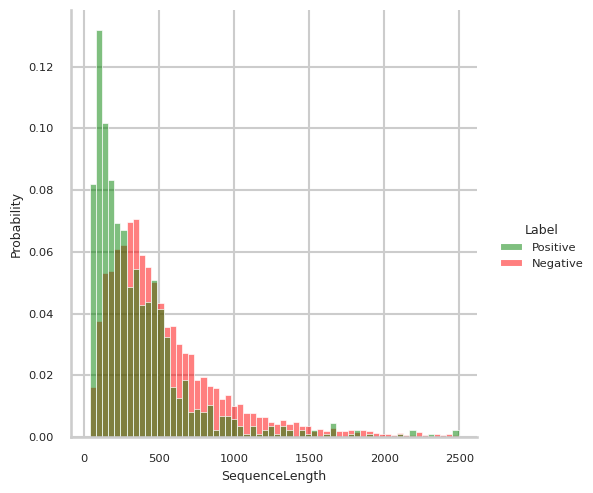

In [10]:
sns.displot(

     data = df_train[df_train["SequenceLength"]<=2500],
     x = "SequenceLength",
     hue = "Label",
     common_norm = False,
     stat = "probability",

    )

In [11]:
# We decided to focus on sequences up to a length of 2500 residues to improve the readability of the plot.
# Our goal is to compare the length distribution between positive and negative sequences of the Training Set.
# As we can see, sequences longer than 2500 residues are very few and mostly belong to the positive class, which means they do not
# provide useful information for the comparison.

df_train.loc[(df_train["SequenceLength"] > 2500) & (df_train["Label"] == "Positive")]

,SequenceLength,Label,Set
33,3083,Positive,4
104,5263,Positive,1
273,2692,Positive,1
322,2813,Positive,4
405,3330,Positive,1
462,3380,Positive,1
668,2586,Positive,1
677,2898,Positive,1
695,3351,Positive,4


In [12]:
df_train.loc[(df_train["SequenceLength"] > 2500) & (df_train["Label"] == "Negative")]

,SequenceLength,Label,Set
1162,3114,Negative,4
1275,4062,Negative,0
1321,3117,Negative,3
1433,4717,Negative,3
1543,2742,Negative,0
...,...,...,...
7434,2856,Negative,0
7563,3046,Negative,4
7885,5560,Negative,1
7968,2843,Negative,0


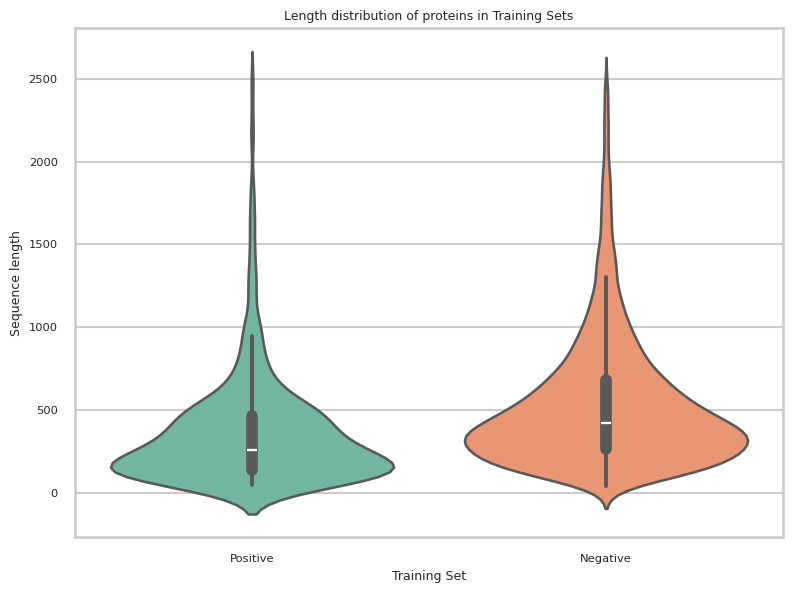

In [13]:
df_train_filtered_low = df_train.loc[df_train["SequenceLength"] < 2500]
df_train_filtered_low
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_train_filtered_low,
    x="Label",                  # Positive vs negative
    y="SequenceLength",       # lenght distribution
    hue="Label",
    palette="Set2",
    split=False,
    inner="box"               # boxplot
)

plt.title("Length distribution of proteins in Training Sets")
plt.ylabel("Sequence length")
plt.xlabel("Training Set")
plt.tight_layout()
plt.show()

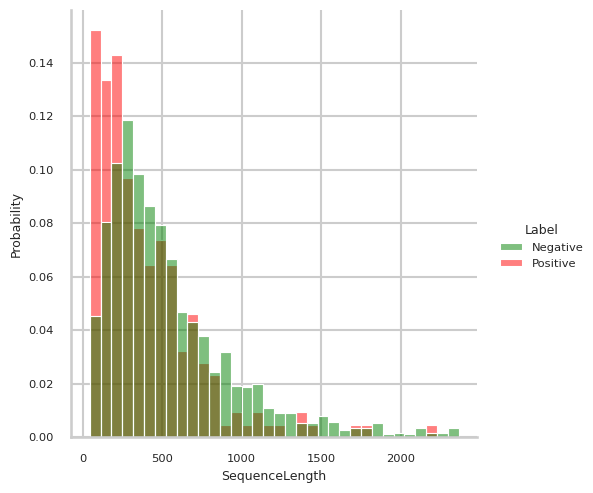

In [15]:
sns.displot(

     data = df_bench[df_bench["SequenceLength"]<=2500],
     x = "SequenceLength",
     hue = "Label",
     common_norm = False,
     stat = "probability"

    )

In [16]:
# We decided to focus on sequences up to a length of 2500 residues to improve the readability of the plot.
# Our goal is to compare the length distribution between positive and negative sequences of the Benchmark Set.
# As we can see, sequences longer than 2500 residues are very few and mostly belong to the positive class, which means
# they do not provide useful information for the comparison.

df_bench.loc[df_bench["SequenceLength"] > 2500]

,SequenceLength,Label,Set
126,3790,Negative,Benchmark
127,2798,Negative,Benchmark
263,4367,Negative,Benchmark
283,3418,Negative,Benchmark
385,2646,Negative,Benchmark
684,3078,Negative,Benchmark
898,3056,Negative,Benchmark
962,2618,Negative,Benchmark
965,4377,Negative,Benchmark
970,3241,Negative,Benchmark


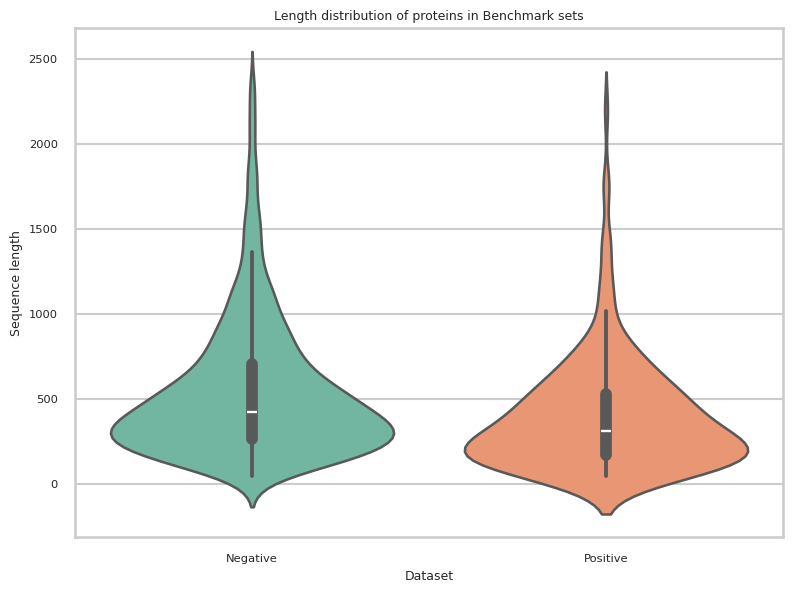

In [17]:
df_benchmark_filtered = df_bench.loc[df_bench["SequenceLength"] < 2500]
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_benchmark_filtered,
    x="Label",                  # Train vs Benchmark
    y="SequenceLength",       # distribuzione lunghezze
    hue="Label",              # Positive vs Negative
    palette="Set2",
    split=False,
    inner="box"               # aggiunge il boxplot dentro al violino
)

plt.title("Length distribution of proteins in Benchmark sets")
plt.ylabel("Sequence length")
plt.xlabel("Dataset")
plt.tight_layout()
plt.show()

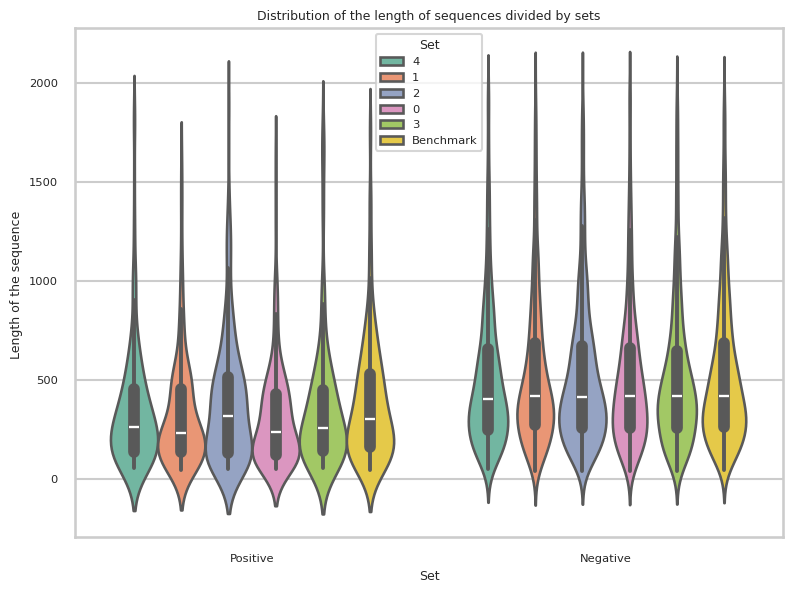

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

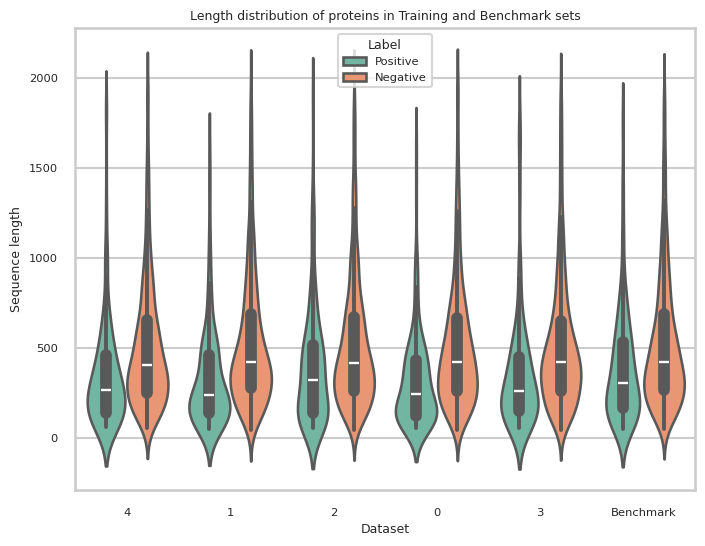

In [19]:
#since the majority of proteins has a length lower than 5000 aa, we can filter out and plot all the proteins with lower length
df_train_filtered_lower = df_train.loc[df_train["SequenceLength"] < 2000]
df_bench_filtered_lower = df_bench.loc[df_bench["SequenceLength"] < 2000]


#we can visualise the differences among lengths distribution of positive and negative proteins
#dividing by the sets we created, specifically the Benchmark set and the five subsets of the training.
#violin plot

df_lengths_filtered = pd.concat([df_train_filtered_lower, df_bench_filtered_lower], ignore_index = True)

plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_lengths_filtered,
    x="Label",
    y="SequenceLength",
    hue="Set",   # coloring per different classes
    palette="Set2",
    inner="box"    # boxplot
)

plt.title("Distribution of the length of sequences divided by sets")
plt.ylabel("Length of the sequence ")
plt.xlabel("Set")
plt.tight_layout()
plt.show()
#we can show de differences among the classes
plt.figure(figsize=(8, 6))
sns.violinplot(
    data= df_lengths_filtered,
    x="Set",                  # Train vs Benchmark
    y="SequenceLength",       # distribuzione lunghezze
    hue="Label",              # Positive vs Negative
    palette="Set2",
    split=False,
    inner="box"               # aggiunge il boxplot dentro al violino
)

plt.title("Length distribution of proteins in Training and Benchmark sets")
plt.ylabel("Sequence length")
plt.xlabel("Dataset")
plt.legend(title="Label")     # legenda automatica basata su hue
plt.tight_layout

In [20]:
# Create DataFrames to compare SP lengths in positive proteins between the training set and the benchmark set.

df_SP_length = df[["SequenceLength","Label","Set","SPEnd"]]

SP_dataset = []


for _, row in df_SP_length.iterrows():
    if pd.notna(row["SPEnd"]):
        SP_dataset.append(row)

    else:
        continue



df_SP_dataset = pd.DataFrame(SP_dataset)

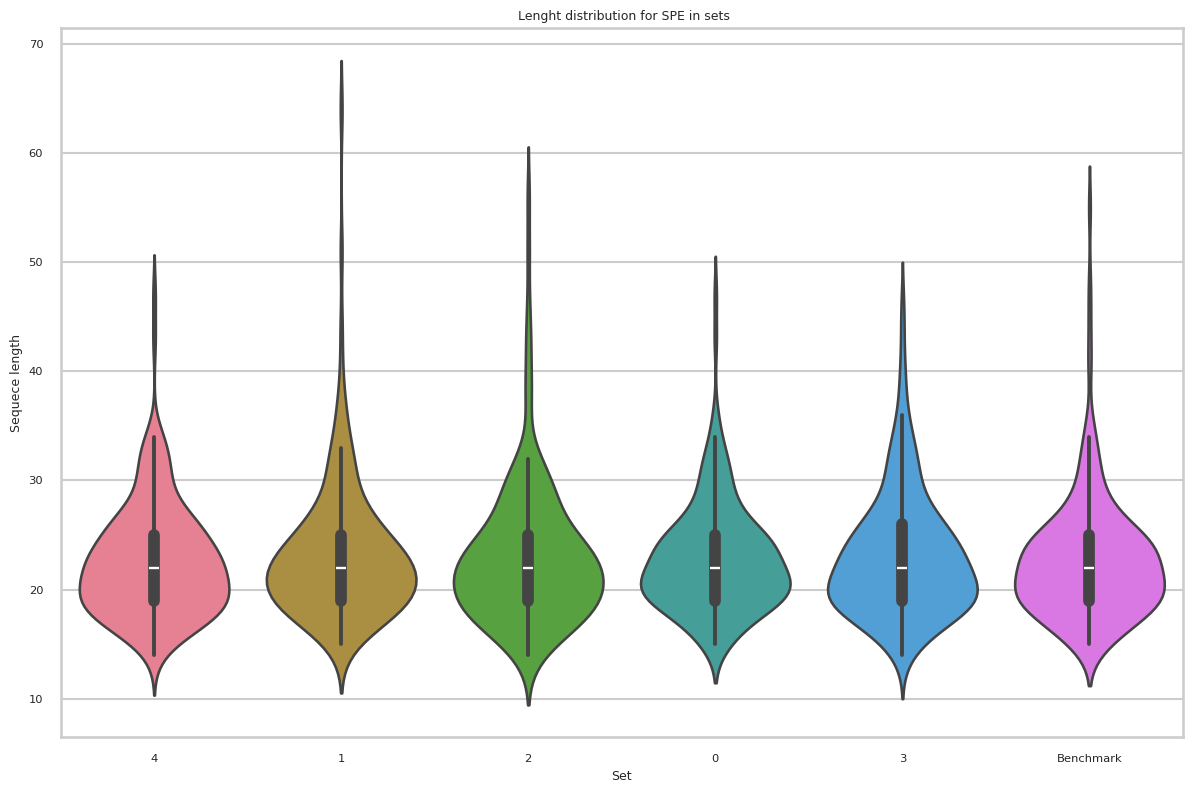

In [22]:
#We can check for the distirbution of SP lenghts in the different subsets and the benchmark set
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_SP_dataset,
    x = "Set",
    y="SPEnd",
   hue="Set",
    #palette="Set2",
    inner="box",          # adding boxplot
    split=False,
    common_norm=False     # normalizing groups separately
)

plt.title(" Lenght distribution for SPE in sets")
plt.xlabel("Set")
plt.ylabel("Sequece length")
plt.tight_layout()
plt.show()

In [23]:
df_SP_dataset["SPEnd"].dtype

dtype('float64')

In [24]:
df_SP_dataset

,SequenceLength,Label,Set,SPEnd
0,155,Positive,4,23.0
1,74,Positive,1,26.0
2,63,Positive,2,27.0
3,145,Positive,4,21.0
4,803,Positive,2,21.0
...,...,...,...,...
8235,400,Positive,Benchmark,19.0
8236,111,Positive,Benchmark,34.0
8237,352,Positive,Benchmark,31.0
8238,468,Positive,Benchmark,23.0


In [25]:
df_SP_dataset.loc[df_SP_dataset["Set"] != "Benchmark", "Set"] = "Training"

In [26]:
df_SP_dataset["Set"].unique()

array(['Training', 'Benchmark'], dtype=object)

In [27]:
df_SP_dataset

,SequenceLength,Label,Set,SPEnd
0,155,Positive,Training,23.0
1,74,Positive,Training,26.0
2,63,Positive,Training,27.0
3,145,Positive,Training,21.0
4,803,Positive,Training,21.0
...,...,...,...,...
8235,400,Positive,Benchmark,19.0
8236,111,Positive,Benchmark,34.0
8237,352,Positive,Benchmark,31.0
8238,468,Positive,Benchmark,23.0


In [28]:
sns.set_theme()
sns.set_theme(
     context='talk',
     style='whitegrid',
     palette=["lightblue","magenta"],
     font='sans-serif',
     font_scale=0.5,
     color_codes=True
    )

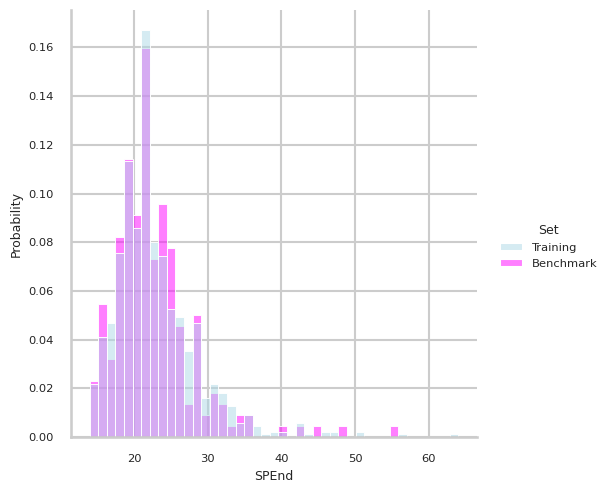

In [29]:
sns.displot(

     data = df_SP_dataset,
     x = "SPEnd",
     hue = "Set",
     common_norm = False,
     stat = "probability"

    )

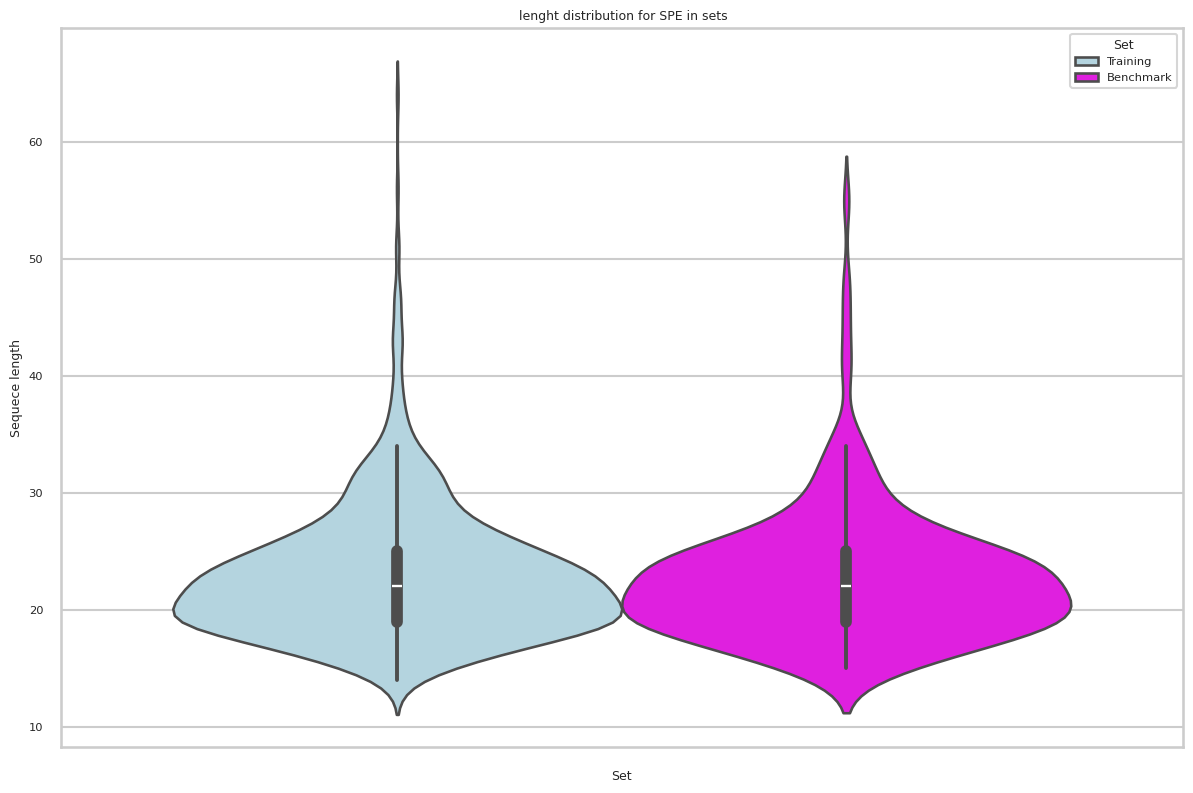

In [30]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_SP_dataset,
    y="SPEnd",
    hue="Set",
    #palette="Set2",
    inner="box",          # adding boxplot
    split=False,
    common_norm=False     # normalizing groups separately
)

plt.title(" lenght distribution for SPE in sets")
plt.xlabel("Set")
plt.ylabel("Sequece length")
plt.legend(title="Set")
plt.tight_layout()
plt.show()

In [31]:
#set the theme
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None
)

In [33]:
# take the .tsv with all the data and put it in a dataframe
df=pd.read_csv("data.tsv" , sep="\t")
print(len(df))
df.head()

10027


,EntryID,OrganismName,Kingdom,SequenceLength,SPStart,SPEnd,Label,HelixDomain,Set,Sequence
0,Q16552,Homo sapiens,Metazoa,155,1.0,23.0,Positive,NaN,4,MTPGKTSLVSLLLLLSLEAIVKAGITIPRNPGCPNSEDKNFPRTVM...
1,Q9M373,Arabidopsis thaliana,Viridiplantae,74,1.0,26.0,Positive,NaN,1,MASRNSVAVIALFAFVFAVISPFAGAQSLAPAPSPTSDGTSIDQGI...
2,P62520,Chilobrachys guangxiensis,Metazoa,63,1.0,27.0,Positive,NaN,2,MKNTSILFILGLALLLVLAFEAQVGESDGECGGFWWKCGRGKPPCC...
3,Q8I7X1,Porcellio scaber,Metazoa,145,1.0,21.0,Positive,NaN,4,MKGLLFIVSLLCLTLHQRVWAYQVIGMKSDVICADIRFTVHCICNE...
4,P14625,Homo sapiens,Metazoa,803,1.0,21.0,Positive,NaN,2,MRALWVLGLCCVLLTFGSVRADDEVDVDGTVEEDLGKSREGSRTDD...


In [34]:
# to keep only SP entries, keep sequences that have either SPStart and SPEnd column values different from null.
sp_df=df[df["SPStart"].notna()]
print(len(sp_df))
sp_df.head()

1093


,EntryID,OrganismName,Kingdom,SequenceLength,SPStart,SPEnd,Label,HelixDomain,Set,Sequence
0,Q16552,Homo sapiens,Metazoa,155,1.0,23.0,Positive,NaN,4,MTPGKTSLVSLLLLLSLEAIVKAGITIPRNPGCPNSEDKNFPRTVM...
1,Q9M373,Arabidopsis thaliana,Viridiplantae,74,1.0,26.0,Positive,NaN,1,MASRNSVAVIALFAFVFAVISPFAGAQSLAPAPSPTSDGTSIDQGI...
2,P62520,Chilobrachys guangxiensis,Metazoa,63,1.0,27.0,Positive,NaN,2,MKNTSILFILGLALLLVLAFEAQVGESDGECGGFWWKCGRGKPPCC...
3,Q8I7X1,Porcellio scaber,Metazoa,145,1.0,21.0,Positive,NaN,4,MKGLLFIVSLLCLTLHQRVWAYQVIGMKSDVICADIRFTVHCICNE...
4,P14625,Homo sapiens,Metazoa,803,1.0,21.0,Positive,NaN,2,MRALWVLGLCCVLLTFGSVRADDEVDVDGTVEEDLGKSREGSRTDD...


In [35]:
# reduce the dataframe to keep only the columns of interest
sp_seqs=sp_df[["EntryID" , "Sequence" , "SPStart" , "SPEnd" , "Set"]]
print(len(sp_seqs))
sp_seqs.head()

1093


,EntryID,Sequence,SPStart,SPEnd,Set
0,Q16552,MTPGKTSLVSLLLLLSLEAIVKAGITIPRNPGCPNSEDKNFPRTVM...,1.0,23.0,4
1,Q9M373,MASRNSVAVIALFAFVFAVISPFAGAQSLAPAPSPTSDGTSIDQGI...,1.0,26.0,1
2,P62520,MKNTSILFILGLALLLVLAFEAQVGESDGECGGFWWKCGRGKPPCC...,1.0,27.0,2
3,Q8I7X1,MKGLLFIVSLLCLTLHQRVWAYQVIGMKSDVICADIRFTVHCICNE...,1.0,21.0,4
4,P14625,MRALWVLGLCCVLLTFGSVRADDEVDVDGTVEEDLGKSREGSRTDD...,1.0,21.0,2


In [36]:
# inizialise two dictionaries that contain all the proteogenic aa. One for benchmark and one for training
aa_bench = { "A" : 0 , "R" : 0 , "N" : 0 , "D" : 0 , "C" : 0 , "Q" : 0, "E" : 0, "G" : 0, "H" : 0, "I" : 0 ,"L" : 0, "K" : 0, "M" : 0, "F" : 0, "P" : 0, "S" : 0, "T" : 0, "W" : 0, "Y" : 0 , "V": 0}
aa_train = { "A" : 0 , "R" : 0 , "N" : 0 , "D" : 0 , "C" : 0 , "Q" : 0, "E" : 0, "G" : 0, "H" : 0, "I" : 0 ,"L" : 0, "K" : 0, "M" : 0, "F" : 0, "P" : 0, "S" : 0, "T" : 0, "W" : 0, "Y" : 0 , "V": 0}

# inizialise the total count of the residues in the sequences
total_residues_bench = 0
total_residues_train = 0
for index , row in sp_seqs.iterrows():
    start = int(row["SPStart"])
    end = int(row["SPEnd"])
    #slice the sequence to the interval that contains the signal peptide
    signal_peptide_seq = str(row["Sequence"])
    signal_peptide_seq = signal_peptide_seq[start-1:end] #we put start -1 because the index needs to start at 0
    # count the residues in the current sequence
    for residue in signal_peptide_seq:
        if residue in aa_bench.keys() and row["Set"] == "Benchmark":
            aa_bench[residue] = aa_bench[residue] + 1
            total_residues_bench = total_residues_bench + 1
        elif residue in aa_train.keys() and row["Set"] in "12345":
            aa_train[residue] = aa_train[residue] + 1
            total_residues_train = total_residues_train +1

print(aa_bench , total_residues_bench)
print(aa_train , total_residues_train)
#now we have both the total number of residues for training and bench and a dictionary containing single residue data.

{'A': 769, 'R': 196, 'N': 47, 'D': 38, 'C': 146, 'Q': 92, 'E': 62, 'G': 272, 'H': 57, 'I': 234, 'L': 1062, 'K': 104, 'M': 335, 'F': 244, 'P': 178, 'S': 387, 'T': 225, 'W': 85, 'Y': 46, 'V': 388} 4967
{'A': 2249, 'R': 475, 'N': 163, 'D': 139, 'C': 451, 'Q': 345, 'E': 221, 'G': 969, 'H': 182, 'I': 720, 'L': 3529, 'K': 365, 'M': 991, 'F': 815, 'P': 677, 'S': 1205, 'T': 720, 'W': 297, 'Y': 171, 'V': 1377} 16061


In [37]:
# divide every entry of the dictionary for the total number of residues to obtain the frequency
for residue in aa_bench.keys():
    aa_bench[residue] = aa_bench[residue] / total_residues_bench
for residue in aa_train.keys():
    aa_train[residue] = aa_train[residue] / total_residues_train
print(aa_train)
print(aa_bench)

{'A': 0.1400286408069236, 'R': 0.02957474627980823, 'N': 0.010148807670755246, 'D': 0.008654504700828092, 'C': 0.02808044330988108, 'Q': 0.02148060519270282, 'E': 0.013760039848079199, 'G': 0.06033248241080879, 'H': 0.011331797521947575, 'I': 0.044829089097814585, 'L': 0.21972479920303842, 'K': 0.022725857667642114, 'M': 0.061702260133242016, 'F': 0.05074403835377623, 'P': 0.0421517962766951, 'S': 0.07502646161509247, 'T': 0.044829089097814585, 'W': 0.018491999252848515, 'Y': 0.010646908660730963, 'V': 0.08573563289957038}
{'A': 0.15482182403865513, 'R': 0.03946043889671834, 'N': 0.009462452184417153, 'D': 0.007650493255486209, 'C': 0.02939400040265754, 'Q': 0.018522246829071873, 'E': 0.012482383732635393, 'G': 0.05476142540769076, 'H': 0.011475739883229313, 'I': 0.04711093215220455, 'L': 0.21381115361385142, 'K': 0.020938192067646466, 'M': 0.06744513791020737, 'F': 0.04912421985101671, 'P': 0.035836521038856456, 'S': 0.0779142339440306, 'T': 0.04529897322327361, 'W': 0.017112945439903

In [38]:
# as a safety check compute the sum of the frequencies, it should equal 1
freq_train_tot = 0
freq_bench_tot = 0
for residue in aa_bench.keys():
    freq_bench_tot = freq_bench_tot + aa_bench[residue]
for residue in aa_train.keys():
    freq_train_tot = freq_train_tot + aa_train[residue]
print (freq_train_tot , freq_bench_tot)

1.0 0.9999999999999999


In [40]:
swiss_frequencies = { "A" : 0.0825 , "R" : 0.0552 , "N" : 0.0406 , "D" : 0.0546 , "C" : 0.0138 , "Q" : 0.0393, "E" : 0.0671, "G" : 0.0707, "H" : 0.0227, "I" : 0.0590 ,"L" : 0.0964, "K" : 0.0579, "M" : 0.0241, "F" : 0.0386, "P" : 0.0474, "S" : 0.0665, "T" : 0.0536, "W" : 0.0110, "Y" : 0.0292 , "V": 0.0685}

In [41]:
# create the dataframes
bench_df = pd.DataFrame(aa_bench.items(), columns=["Residue", "Frequency"])
bench_df["Database"] = "Benchmark"
train_df = pd.DataFrame(aa_train.items(), columns=["Residue", "Frequency"])
train_df["Database"] = "Training"
swiss_df = pd.DataFrame(swiss_frequencies.items(), columns=["Residue", "Frequency"])
swiss_df["Database"] = "SwissProt"
bench_df.head()

,Residue,Frequency,Database
0,A,0.154822,Benchmark
1,R,0.039460,Benchmark
2,N,0.009462,Benchmark
3,D,0.007650,Benchmark
4,C,0.029394,Benchmark


In [42]:
# create the dataframes
bench_df = pd.DataFrame(aa_bench.items(), columns=["Residue", "Frequency"])
bench_df["Database"] = "Benchmark"
train_df = pd.DataFrame(aa_train.items(), columns=["Residue", "Frequency"])
train_df["Database"] = "Training"
swiss_df = pd.DataFrame(swiss_frequencies.items(), columns=["Residue", "Frequency"])
swiss_df["Database"] = "SwissProt"
bench_df.head()

,Residue,Frequency,Database
0,A,0.154822,Benchmark
1,R,0.039460,Benchmark
2,N,0.009462,Benchmark
3,D,0.007650,Benchmark
4,C,0.029394,Benchmark


In [43]:
# merge training and swissprot dataframes and benchmark and swissprot dataframes to obtain final dataframes we need
train_final = pd.concat([train_df , swiss_df], ignore_index=True)
bench_final = pd.concat([bench_df , swiss_df], ignore_index=True)
bench_final.head()

,Residue,Frequency,Database
0,A,0.154822,Benchmark
1,R,0.039460,Benchmark
2,N,0.009462,Benchmark
3,D,0.007650,Benchmark
4,C,0.029394,Benchmark


In [44]:
bench_final.tail()

,Residue,Frequency,Database
35,S,0.0665,SwissProt
36,T,0.0536,SwissProt
37,W,0.0110,SwissProt
38,Y,0.0292,SwissProt
39,V,0.0685,SwissProt


In [45]:
bench_final.query("Residue == 'A'")

,Residue,Frequency,Database
0,A,0.154822,Benchmark
20,A,0.082500,SwissProt


In [46]:
# define categories of aminoacids
groups = {
    "Apolar":   ["G","A","V","P","L","I","M"],
    "Aromatic": ["F","W","Y"],
    "Polar":    ["S","T","C","N","Q","H"],
    "Charged":  ["D","E","K","R"],
}
# create a list with the correct order for the aminoacids
ordered_residues = sum(groups.values(), [])

In [47]:
from matplotlib.lines import Line2D

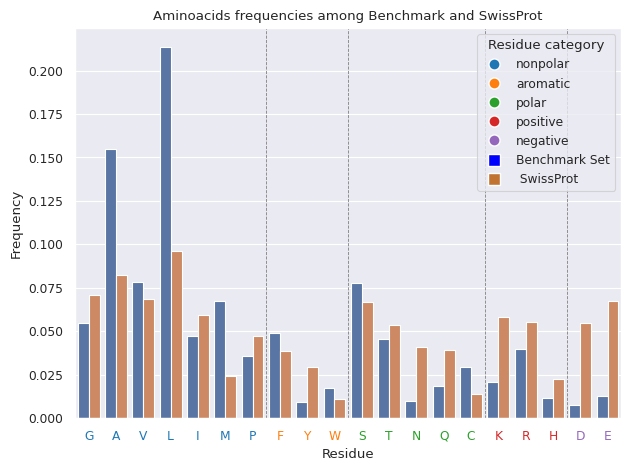

In [49]:
df = bench_final
# we can cathegorize our ammino acid on the x axis using their phisical-chemical characteristics
#  categorical map for aa depending on their phisical_chemical characteristics
aa_categories = {
    # nonpolar aliphatic
    'nonpolar': list("GAVLIMP"),   # gly, ala, val, leu, ile, met, pro
    # aromatic
    'aromatic': list("FYW"),       # phe, tyr, trp
    # polar uncharged
    'polar': list("STNQC"),        # ser, thr, asn, gln, cys (C included as polar)
    # positive
    'positive': list("KRH"),       # lys, arg, his
    # negative
    'negative': list("DE"),        # asp, glu
}
#ordered list of amminoacids
aa_order = [
    'G','A','V','L','I','M','P',   # nonpolar
    'F','Y','W',                   # aromatic
    'S','T','N','Q','C',           # polar
    'K','R','H',                   # positive
    'D','E'                        # negative
]


#we map each residue as a cathegories to color etikes later
res_to_cat = {aa: cat for cat, aas in aa_categories.items() for aa in aas}

bench_plot = sns.barplot(
 data=bench_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 order = aa_order,
)
#column residue imust be Categorical and ordered
df['Residue'] = pd.Categorical(df['Residue'], categories=aa_order, ordered=True)

# xtick labels are colored based on categories
cat_colors = {'nonpolar':'#1f77b4', 'aromatic':'#ff7f0e', 'polar':'#2ca02c', 'positive':'#d62728', 'negative':'#9467bd'}
for label in bench_plot.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa, None)
    if cat:
        label.set_color(cat_colors[cat])

# we add lines between categories, finding indexes (xvals where categories changes)
group_boundaries = []
current_cat = None
for i, aa in enumerate(aa_order):
    cat = res_to_cat[aa]
    if current_cat is None:
        current_cat = cat
    elif cat != current_cat:
        group_boundaries.append(i - 0.5)  # position btw tick i-1 e i
        current_cat = cat

for x in group_boundaries:
    bench_plot.axvline(x=x, color='gray', linestyle='--', linewidth=0.6)

#we created specific handles for the legend (a colored point for each cathegries)
legend_handles = [Line2D([0], [0], marker='o', color='w',
                         markerfacecolor=color, markersize=8, linestyle='')
                  for color in cat_colors.values()]


#corresponding lables
legend_labels = list(cat_colors.keys())
# adding two handle quadrati per training e test
set_handles = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, linestyle=''),
    Line2D([0], [0], marker='s', color='w', markerfacecolor="#c17431", markersize=8, linestyle='')
]
set_labels = ['Benchmark Set', ' SwissProt']

# Uniamo tutti gli handle e le label
legend_handles += set_handles
legend_labels += set_labels


# adding legend to the plot
plt.legend(handles=legend_handles, labels=legend_labels, title="Residue category", loc='upper right')
#bench_plot.set_xlabel("Residue")
#bench_plot.set_ylabel("Frequency")
plt.title("Aminoacids frequencies among Benchmark and SwissProt")
plt.tight_layout()
plt.show()

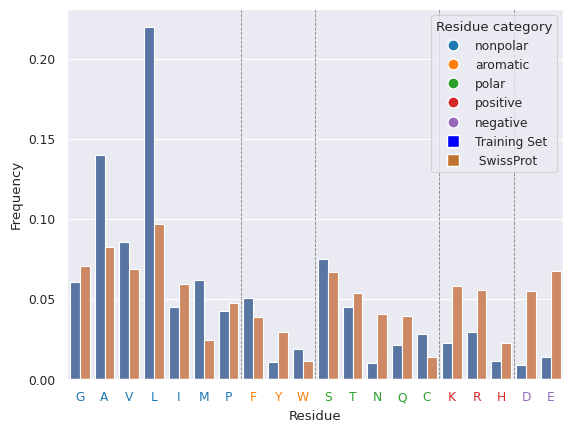

In [50]:
train_plot = sns.barplot(
 data=train_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 order=aa_order,

)
#adding vertical lines
for x in group_boundaries:
    train_plot.axvline(x=x, color='gray', linestyle='--', linewidth=0.6)
# xtick labels are colored based on categories
cat_colors = {'nonpolar':'#1f77b4', 'aromatic':'#ff7f0e', 'polar':'#2ca02c', 'positive':'#d62728', 'negative':'#9467bd'}
for label in train_plot.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa, None)
    if cat:
        label.set_color(cat_colors[cat])

#we created specific handles for the legend (a colored point for each cathegries)
legend_handles_1 = [Line2D([0], [0], marker='o', color='w',
                         markerfacecolor=color, markersize=8, linestyle='')
                  for color in cat_colors.values()]


#corresponding lables
legend_labels_1 = list(cat_colors.keys())
# adding two handle quadrati per training e test
set_handles_1 = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, linestyle=''),
    Line2D([0], [0], marker='s', color='w', markerfacecolor="#c17431", markersize=8, linestyle='')
]
set_labels_1 = ['Training Set', ' SwissProt']

# Uniamo tutti gli handle e le label
legend_handles_1 += set_handles_1
legend_labels_1 += set_labels_1

# adding legend to the plot
plt.legend(handles=legend_handles_1, labels=legend_labels_1, title="Residue category", loc='upper right')

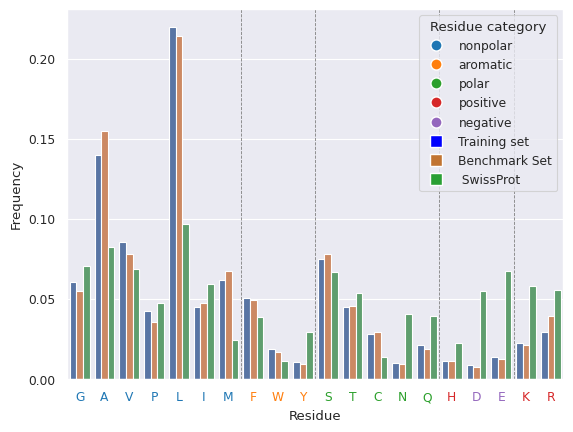

In [52]:
total_final = pd.concat([train_df , bench_df , swiss_df] , ignore_index=True)
total_plot = sns.barplot(
 data=total_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 order=ordered_residues,
)
#adding vertical lines
for x in group_boundaries:
    total_plot.axvline(x=x, color='gray', linestyle='--', linewidth=0.6)

# xtick labels are colored based on categories
cat_colors = {'nonpolar':'#1f77b4', 'aromatic':'#ff7f0e', 'polar':'#2ca02c', 'positive':'#d62728', 'negative':'#9467bd'}
for label in total_plot.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa, None)
    if cat:
        label.set_color(cat_colors[cat])


#we created specific handles for the legend (a colored point for each cathegries)
legend_handles_2 = [Line2D([0], [0], marker='o', color='w',
                         markerfacecolor=color, markersize=8, linestyle='')
                  for color in cat_colors.values()]

#corresponding lables
legend_labels_2 = list(cat_colors.keys())
# adding two handle quadrati per training e test
set_handles_2 = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, linestyle=''),
    Line2D([0], [0], marker='s', color='w', markerfacecolor="#c17431", markersize=8, linestyle=''),
    Line2D([0], [0], marker='s', color='w', markerfacecolor="#2aa034", markersize=8, linestyle='')
]
set_labels_2 = ["Training set", 'Benchmark Set', ' SwissProt']

# Uniamo tutti gli handle e le label
legend_handles_2 += set_handles_2
legend_labels_2 += set_labels_2

# adding legend to the plot
plt.legend(handles=legend_handles_2, labels=legend_labels_2, title="Residue category", loc='upper right')

In [54]:
df=pd.read_csv("data.tsv", sep="\t")
df
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())

Number of OrganismName unique values:  435


In [55]:
#Recover the ten most frequent OrganismName to make the unique value number of OrganismName field comparable to Kingdom field unique value number
tmp_var=df.groupby('OrganismName').nunique().sort_values(by='EntryID', ascending=False).head(6).reset_index()
tmp_most_rep=tmp_var['OrganismName'].tolist()
df.loc[~df["OrganismName"].isin(tmp_most_rep), "OrganismName"] = "Other"
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())

Number of OrganismName unique values:  7


In [56]:
#initalisation
aa_list = list("ARNDCQEGHILKMFPSTWYV")
aa_bench = {aa: 0 for aa in aa_list}
aa_train_sets = {s: {aa: 0 for aa in aa_list} for s in ["1","2","3","4","5"]}

total_residues_bench = 0
total_residues_train_sets = {s: 0 for s in ["1","2","3","4","5"]}

# iterating over sequences
for index, row in sp_seqs.iterrows():
    start = int(row["SPStart"])
    end = int(row["SPEnd"])
    seq = str(row["Sequence"])[start-1:end]  # slice signal peptide

    if row["Set"] == "Benchmark": #Benchmarking set
        for residue in seq:
            if residue in aa_bench:
                aa_bench[residue] += 1
                total_residues_bench += 1

    elif row["Set"] in ["1","2","3","4","5"]: #Training set, divided for the 5 subsets
        subset = row["Set"]
        for residue in seq:
            if residue in aa_train_sets[subset]:
                aa_train_sets[subset][residue] += 1
                total_residues_train_sets[subset] += 1

#dataframe with relative frequencies
dfs_per_set = {}

# Benchmark
data = {"Residue": [], "Frequency": [], "Set": []}
for aa in aa_list:
    data["Residue"].append(aa)
    data["Frequency"].append(aa_bench[aa] / total_residues_bench if total_residues_bench>0 else 0)
    data["Set"].append("Benchmark")
dfs_per_set["Benchmark"] = pd.DataFrame(data)

# Training sets 1-5
for s in ["1","2","3","4","5"]:
    data = {"Residue": [], "Frequency": [], "Set": []}
    total = total_residues_train_sets[s]
    for aa in aa_list:
        data["Residue"].append(aa)
        data["Frequency"].append(aa_train_sets[s][aa] / total if total>0 else 0)
        data["Set"].append(s)
    dfs_per_set[s] = pd.DataFrame(data)

#to see different subsets
print(dfs_per_set["1"])

   Residue  Frequency Set
0        A   0.138643   1
1        R   0.029253   1
2        N   0.007620   1
3        D   0.006391   1
4        C   0.020157   1
5        Q   0.021141   1
6        E   0.014258   1
7        G   0.063668   1
8        H   0.011062   1
9        I   0.046214   1
10       L   0.213373   1
11       K   0.022370   1
12       M   0.059243   1
13       F   0.053835   1
14       P   0.043510   1
15       S   0.076450   1
16       T   0.044248   1
17       W   0.021386   1
18       Y   0.011308   1
19       V   0.095870   1


In [57]:
#creating single df
all_df = pd.DataFrame()
for s, df_set in dfs_per_set.items():
    all_df = pd.concat([all_df, df_set], ignore_index=True)
#all_df = pd.concat([all_df,swiss_df], ignore_index = True)
#all_df = pd.concat([all_df, train_df], ignore_index = True)
print(all_df.tail())
train_df= train_df.rename(columns={"Database": "Set"})
swiss_df = swiss_df.rename(columns = {"Database": "Set"})
all_df = pd.concat([all_df, train_df], ignore_index = True)
all_df = pd.concat([all_df, swiss_df], ignore_index = True)
print(all_df.tail())
#ordering residues

    Residue  Frequency Set
115       S        0.0   5
116       T        0.0   5
117       W        0.0   5
118       Y        0.0   5
119       V        0.0   5
    Residue  Frequency        Set
155       S     0.0665  SwissProt
156       T     0.0536  SwissProt
157       W     0.0110  SwissProt
158       Y     0.0292  SwissProt
159       V     0.0685  SwissProt


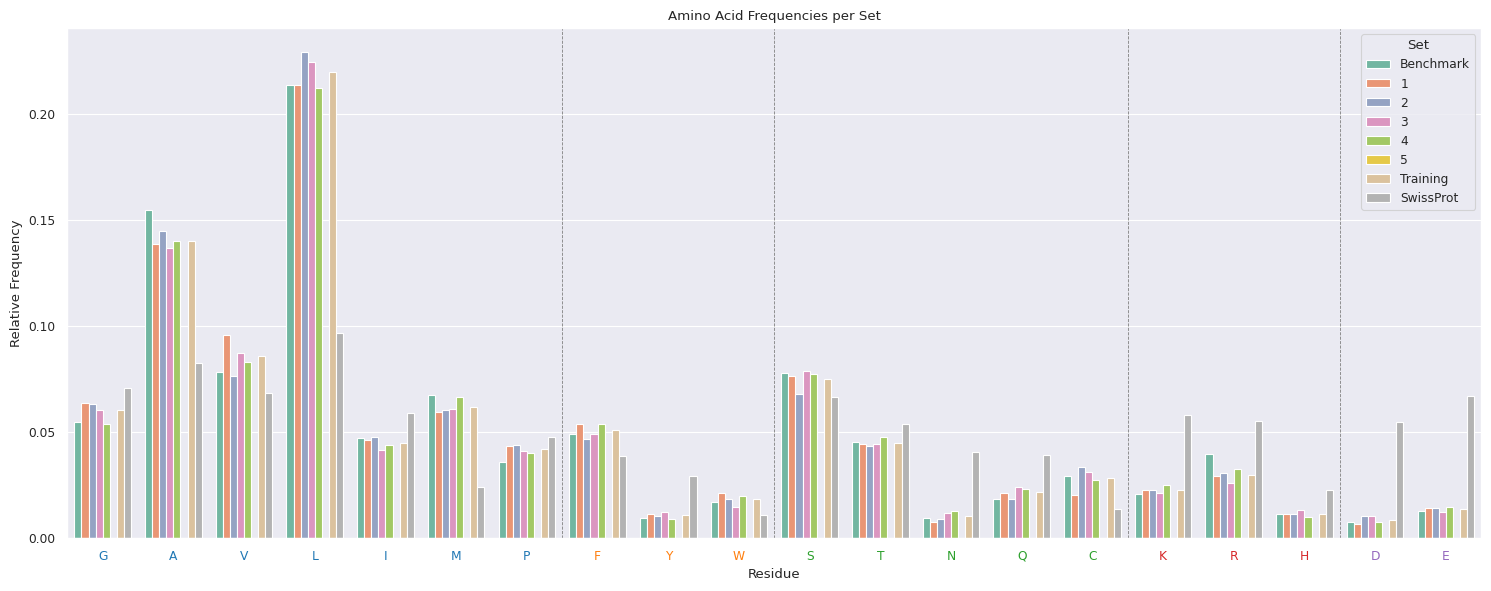

In [59]:
# barplot with aa frequnecies divided by sets
plt.figure(figsize=(15,6))
ax = sns.barplot(data=all_df, x="Residue", y="Frequency", hue="Set", order=aa_order, palette="Set2")

#adding vertical lines
for x in group_boundaries:
    ax.axvline(x=x, color='gray', linestyle='--', linewidth=0.6)
# xtick labels are colored based on categories
cat_colors = {'nonpolar':'#1f77b4', 'aromatic':'#ff7f0e', 'polar':'#2ca02c', 'positive':'#d62728', 'negative':'#9467bd'}
for label in ax.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa, None)
    if cat:
        label.set_color(cat_colors[cat])

# adding legend to the plot
plt.legend(handles=legend_handles, labels=legend_labels, title="Residue category", loc='upper right')
#plt.savefig("frequencies_sp_train_vs_swissprot.png", dpi=300, bbox_inches="tight")

ax.set_xlabel("Residue")
ax.set_ylabel("Relative Frequency")
ax.set_title("Amino Acid Frequencies per Set")
plt.legend(title="Set")
plt.tight_layout()
plt.show()

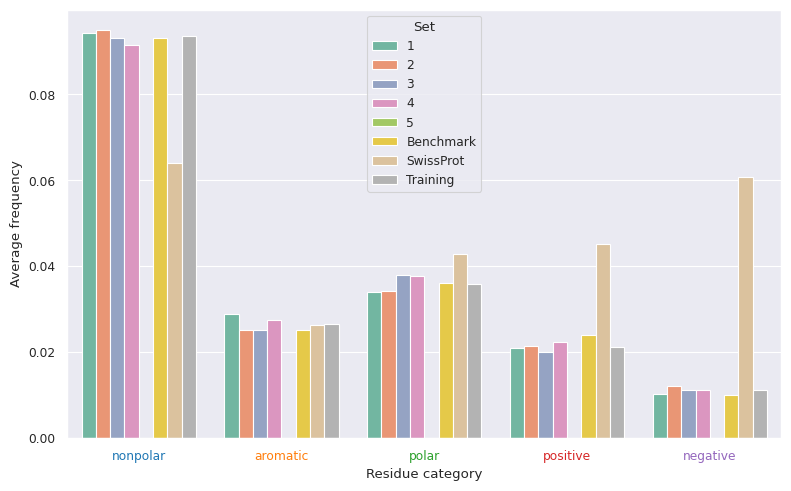

In [61]:
#barplot for aminoacids composition based on chemical-physiucal properties, divided by sets
all_df['category'] = all_df['Residue'].map(res_to_cat)
#column residue imust be Categorical and ordered
all_df['Residue'] = pd.Categorical(all_df['Residue'], categories=aa_order, ordered=True)
# barplot with cathegories
df_agg = all_df.groupby(['category', 'Set'], as_index=False)['Frequency'].mean()

#barplot
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_agg, x='category', y='Frequency', hue='Set', order=aa_categories, palette="Set2")

# Personalised legend
for label in ax.get_xticklabels():
    cat = label.get_text()
    label.set_color(cat_colors[cat])

ax.set_xlabel("Residue category")
ax.set_ylabel("Average frequency")
ax.set_ylabel("Average frequency")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2879633880.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


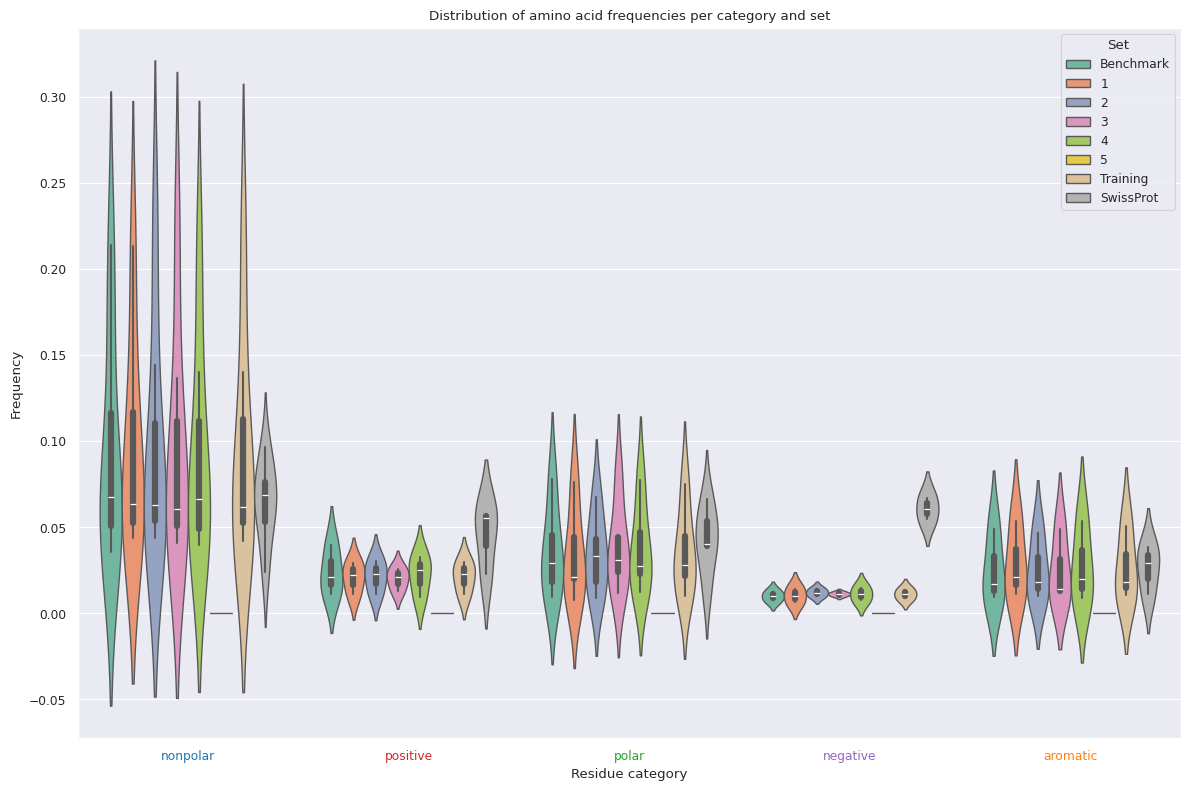

In [63]:
plt.figure(figsize=(12,8))
# Violin plot
ax = sns.violinplot(
    data=all_df,
    x='category',        # categories
    y='Frequency',       # frequences
    hue='Set',
    split=False,         # two violins
    palette="Set2",
    inner="box",
    scale="width"
)

# xtick labels colored
for label in ax.get_xticklabels():
    cat = label.get_text()
    label.set_color(cat_colors[cat])

ax.set_xlabel("Residue category")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of amino acid frequencies per category and set")
plt.legend(title="Set", loc='upper right')
plt.tight_layout()
plt.show()

In [65]:
df=pd.read_csv("data.tsv", sep="\t")
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())

Number of OrganismName unique values:  435


In [66]:
#Recover the ten most frequent OrganismName to make the unique value number of OrganismName field comparable to Kingdom field unique value number
tmp_var=df.groupby('OrganismName').nunique().sort_values(by='EntryID', ascending=False).head(6).reset_index()
tmp_most_rep=tmp_var['OrganismName'].tolist()
df.loc[~df["OrganismName"].isin(tmp_most_rep), "OrganismName"] = "Other"
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())

Number of OrganismName unique values:  7


In [67]:
bench_set=df.query('Set=="Benchmark"')
train_set=df.query('Set=="1" or Set=="2" or Set=="3" or Set=="4" or Set=="5"')

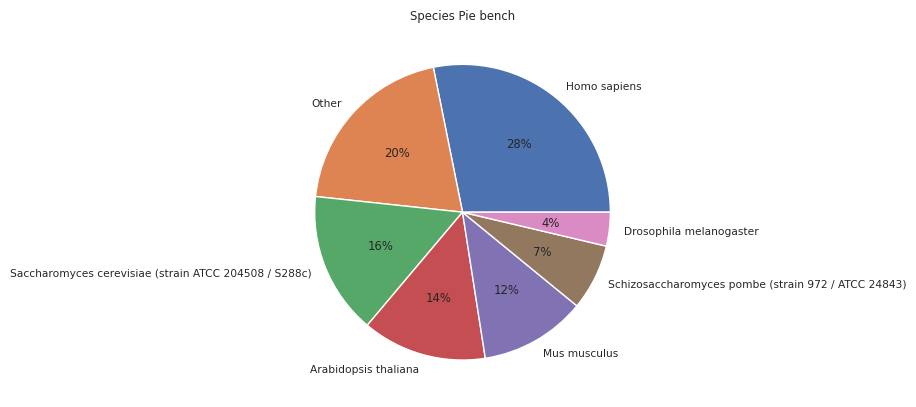

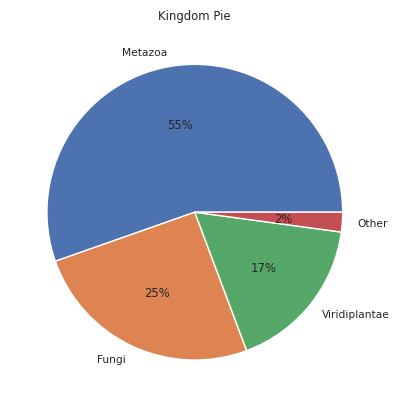

Text(0.5, 0.98, 'Kingdom Barplot Bench')

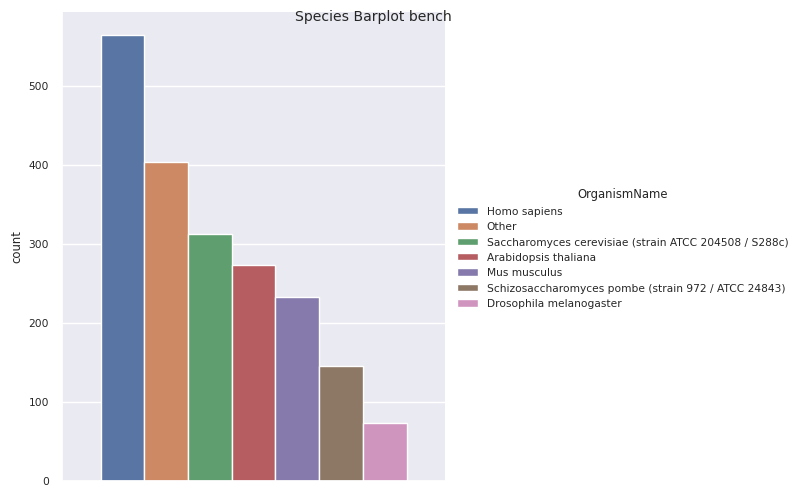

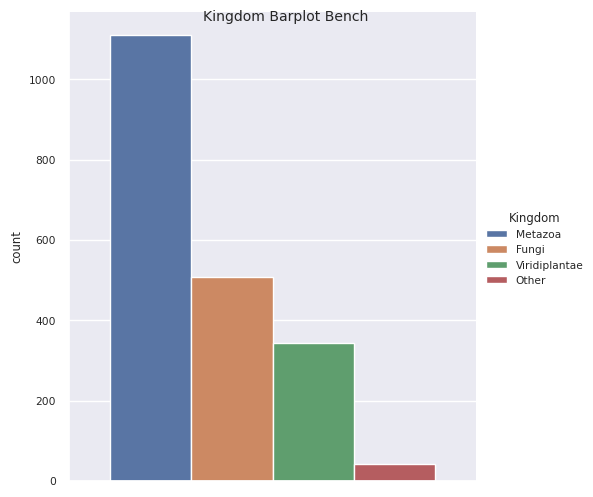

In [71]:
#Create the pie plot with respect of OrganismName
sns.set_theme(context='notebook', style='darkgrid', palette='deep',font='sans-serif', font_scale=0.7,color_codes=True,rc=None)
counts_organismname=bench_set['OrganismName'].value_counts()
plt.pie(counts_organismname, labels=counts_organismname.index,autopct='%1.0f%%')
plt.title("Species Pie bench")
plt.show()

#Create the pie plot with respect of Kingdom
counts_kingdom=bench_set['Kingdom'].value_counts()
plt.pie(counts_kingdom, labels=counts_kingdom.index,autopct='%1.0f%%')
plt.title("Kingdom Pie")
plt.show()

custom_palette = {
    "Bacteria": "skyblue",
    "Archaea": "orange",
    "Eukaryota": "green"
}

#Create the barplot with respect of OrganismName
counts_organismname=counts_organismname.to_frame(name="count")
sns.catplot(counts_organismname,
            #x="OrganismName",
            y="count",
            hue = "OrganismName",
            kind='bar',
            palette = "deep"
            ).set_xticklabels(rotation=90).fig.suptitle("Species Barplot bench")

#Create the barplot with respect of Kingdom
counts_kingdom=counts_kingdom.to_frame(name="count")
sns.catplot(counts_kingdom,
            #x="Kingdom",
            y="count",
            hue = "Kingdom",
            kind='bar',
            palette = "deep"
            ).fig.suptitle("Kingdom Barplot Bench")

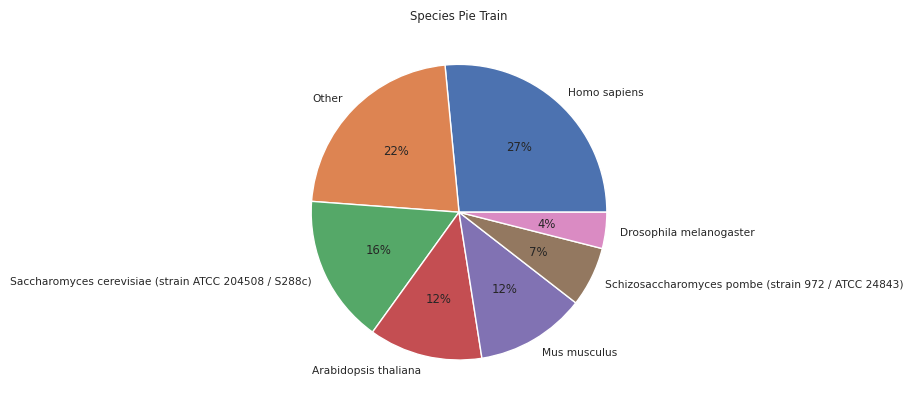

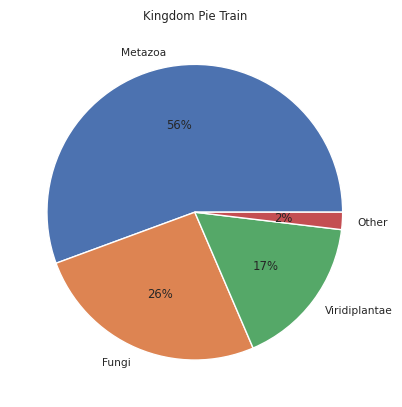

Text(0.5, 0.98, 'Kingdom Barplot Train')

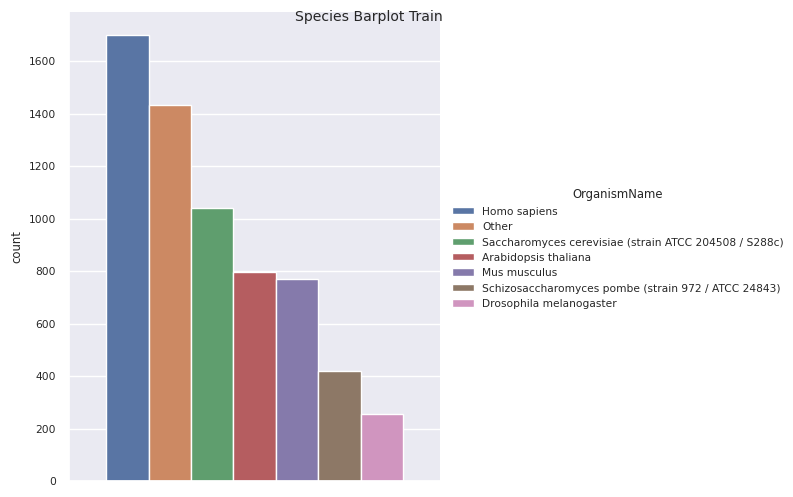

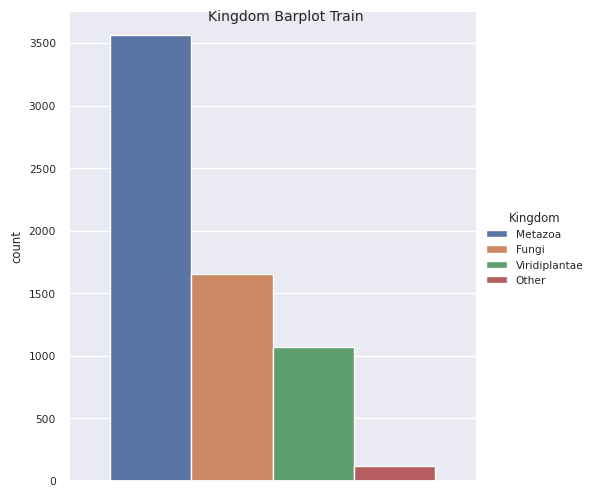

In [72]:
#Create the pie plot with respect of OrganismName
sns.set_theme(context='notebook', style='darkgrid', palette='deep',font='sans-serif', font_scale=0.7,color_codes=True,rc=None)
counts_organismname=train_set['OrganismName'].value_counts()
plt.pie(counts_organismname, labels=counts_organismname.index,autopct='%1.0f%%')
plt.title("Species Pie Train")
plt.show()

#Create the pie plot with respect of Kingdom
counts_kingdom=train_set['Kingdom'].value_counts()
plt.pie(counts_kingdom, labels=counts_kingdom.index,autopct='%1.0f%%')
plt.title("Kingdom Pie Train")
plt.show()

custom_palette = {
    "Bacteria": "skyblue",
    "Archaea": "orange",
    "Eukaryota": "green"
}

#Create the barplot with respect of OrganismName
counts_organismname=counts_organismname.to_frame(name="count")
sns.catplot(counts_organismname,
            #x="OrganismName",
            y="count",
            hue = "OrganismName",
            kind='bar',
            palette = "deep"
            ).set_xticklabels(rotation=90).fig.suptitle("Species Barplot Train")

#Create the barplot with respect of Kingdom
counts_kingdom=counts_kingdom.to_frame(name="count")
sns.catplot(counts_kingdom,
            #x="Kingdom",
            y="count",
            hue = "Kingdom",
            kind='bar',
            palette = "deep"
            ).fig.suptitle("Kingdom Barplot Train")

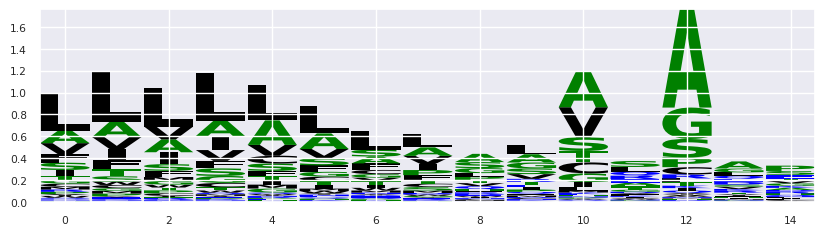

In [73]:
#We need to select the positive and benchmark sequences from the original dataframe
bench_pos=df.query('Label=="Positive" and Set=="Benchmark"')
#you have to recover the region -12 and +3 after cleavage site
bench_seqs=[]
for index,row in bench_pos.iterrows():
        sequence_to_recover=row["Sequence"]
        cleavage_position=int(row["SPEnd"])
        bench_seqs.append(sequence_to_recover[cleavage_position-13:cleavage_position+2])

# Information matrix used to construct the sequence logo
ww_counts_df = lm.alignment_to_matrix(sequences=bench_seqs, to_type='information',characters_to_ignore='.-X') #create a matrix that will be used to build the logo, with the frequencies of the aminoacid in that position

#draw the sequence logo
lm.Logo(ww_counts_df,color_scheme="hydrophobicity")

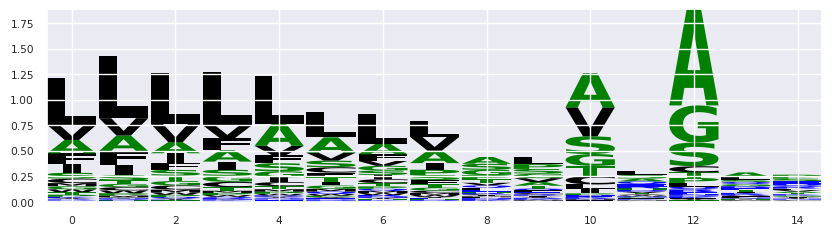

In [75]:
#We need to select the positive and training sequences from the original dataframe
train_pos=df.query('Label=="Positive" and (Set=="1" or Set=="2" or Set=="3" or Set=="4" or Set=="5")')
train_seqs=[]
#you have to recover -12 from SPend and +3 after SPend
for index,row in train_pos.iterrows():
        sequence_to_recover=row["Sequence"]
        cleavage_position=int(row["SPEnd"])
        train_seqs.append(sequence_to_recover[cleavage_position-13:cleavage_position+2])

# Information matrix used to construct the sequence logo
ww_counts_df = lm.alignment_to_matrix(sequences=train_seqs, to_type='information',characters_to_ignore='.-X') #create a matrix that will be used to build the logo, with the frequencies of the aminoacid in that position

#draw the sequence logo
logo=lm.Logo(ww_counts_df,color_scheme="hydrophobicity")

<Figure size 600x1400 with 0 Axes>

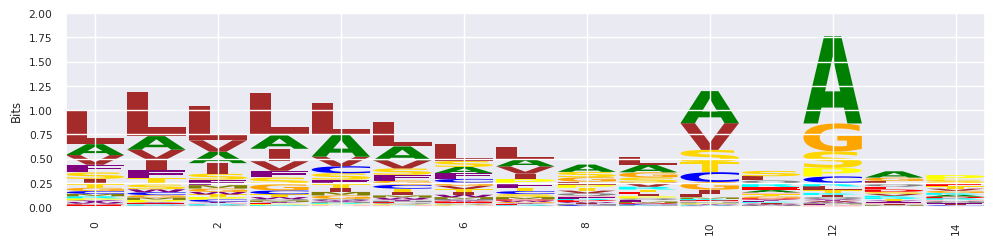

In [76]:
import logomaker as lm

# Information matrix used to construct the sequence logo
ww_counts_df = lm.alignment_to_matrix(sequences=bench_seqs, to_type='information',characters_to_ignore='.-X') #create a matrix that will be used to build the logo, with the frequencies of the aminoacid in that position
custom_colors = {
        'A': 'green',
        'C': 'blue',
        'D': 'red',
        'E': 'red',
        'F': 'purple',
        'G': 'orange',
        'H': 'pink',
        'I': 'brown',
        'K': 'cyan',
        'L': 'brown',
        'M': 'olive',
        'N': 'gray',
        'P': 'yellow',
        'Q': 'gray',
        'R': 'cyan',
        'S': 'gold',
        'T': 'gold',
        'V': 'brown',
        'W': 'purple',
        'Y': 'purple',
        '-': 'white',
    }
#plot the sequence logo
plt.figure(figsize=(6,14))
lm.Logo(ww_counts_df, shade_below=.5, fade_below=.5, color_scheme=custom_colors)

# Customize the appearance

plt.xticks(rotation=90)
plt.ylabel("Bits")
plt.ylim(0, 2.0)  # Adjust the maximum Y-axis limit
plt.tight_layout()
plt.show()